<a href="https://colab.research.google.com/github/arthurabelo/AnaliseFilmesPandas/blob/main/Analise_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE DADOS DE PRODUÇÃO E ARRECADAÇÃO DE FILMES

## PREPARAÇÃO

### INSTALAR E IMPORTAR DEPENDÊNCIAS

In [211]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [212]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

### IMPORTAR OS DADOS

### REMOVER ARQUIVOS EXISTENTES

In [213]:
!rm -rf *.csv

### IMPORTAR CSV

In [214]:
!wget https://raw.githubusercontent.com/armandossrecife/lp20231/main/top-500-movies.csv

--2024-07-11 01:19:35--  https://raw.githubusercontent.com/armandossrecife/lp20231/main/top-500-movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69811 (68K) [text/plain]
Saving to: ‘top-500-movies.csv’

top-500-movies.csv  100%[===================>]  68.17K  --.-KB/s    in 0.004s  

2024-07-11 01:19:35 (18.4 MB/s) - ‘top-500-movies.csv’ saved [69811/69811]



### CRIAR DATAFRAME

In [215]:
dataframe_filmes = pd.read_csv('top-500-movies.csv', sep=',') # Cria tabela (dataframe) a partir do arquivo csv
dataframe_filmes

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,2013-02-06,A Good Day to Die Hard,/movie/Die-Hard-5#tab=summary,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013.0
496,497,2004-04-09,The Alamo,/movie/Alamo-The-(2004)#tab=summary,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0
497,498,1995-12-22,Cutthroat Island,/movie/Cutthroat-Island#tab=summary,92000000,10017322,18517322,2371415.0,PG-13,Adventure,1619.0,NaN,1995.0
498,499,2013-12-19,The Secret Life of Walter Mitty,/movie/Secret-Life-of-Walter-Mitty-The-(2012)#...,91000000,58236838,187861183,12765508.0,PG,Adventure,2922.0,114.0,2013.0


In [216]:
# Exibe as colunas
dataframe_filmes.columns

Index(['rank', 'release_date', 'title', 'url', 'production_cost',
       'domestic_gross', 'worldwide_gross', 'opening_weekend', 'mpaa', 'genre',
       'theaters', 'runtime', 'year'],
      dtype='object')

In [217]:
#retorna tupla contendo linhas/colunas
dataframe_filmes.shape

(500, 13)

In [218]:
# Exibir informações do dataframe
dataframe_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             500 non-null    int64  
 1   release_date     499 non-null    object 
 2   title            500 non-null    object 
 3   url              500 non-null    object 
 4   production_cost  500 non-null    int64  
 5   domestic_gross   500 non-null    int64  
 6   worldwide_gross  500 non-null    int64  
 7   opening_weekend  479 non-null    float64
 8   mpaa             492 non-null    object 
 9   genre            495 non-null    object 
 10  theaters         479 non-null    float64
 11  runtime          487 non-null    float64
 12  year             499 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 50.9+ KB


### Tratamento das colunas com valores NaN (Nulos)

In [219]:
# Verifica os valores "ausentes"
null_release_date = dataframe_filmes['release_date'].isnull()
null_opening_weekend = dataframe_filmes['opening_weekend'].isnull()
null_mpaa = dataframe_filmes['mpaa'].isnull()
null_genre = dataframe_filmes['genre'].isnull()
null_theaters = dataframe_filmes['theaters'].isnull()
null_runtime = dataframe_filmes['runtime'].isnull()
null_year = dataframe_filmes['year'].isnull()

In [220]:
# Imprime os valores "ausentes"
print("release-data: ", null_release_date.sum())
print("opening_weekend: ", null_opening_weekend.sum())
print("mpaa: ", null_mpaa.sum())
print("genre: ", null_genre.sum())
print("theaters: ", null_theaters.sum())
print("runtime: ", null_runtime.sum())
print("year: ", null_year.sum())

release-data:  1
opening_weekend:  21
mpaa:  8
genre:  5
theaters:  21
runtime:  13
year:  1


Remove os registros com valor NaN

Obs:
* axis=0 para se referir as colunas
* axis=1 para se referir as linhas (registros)


In [221]:
colunas_com_valores_null = ['rank', 'production_cost', 'domestic_gross', 'worldwide_gross', 'opening_weekend', 'theaters', 'runtime', 'year']

In [222]:
dataframe_filmes = dataframe_filmes.dropna(subset=colunas_com_valores_null, how='any')
dataframe_filmes

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,2008-02-14,The Spiderwick Chronicles,/movie/Spiderwick-Chronicles-The#tab=summary,92500000,71195053,162839667,19004058.0,PG,Adventure,3847.0,96.0,2008.0
494,495,2004-10-22,The Incredibles,/movie/Incredibles-The#tab=summary,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004.0
495,496,2013-02-06,A Good Day to Die Hard,/movie/Die-Hard-5#tab=summary,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013.0
496,497,2004-04-09,The Alamo,/movie/Alamo-The-(2004)#tab=summary,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0


### Verificar novamente valores nulos

In [223]:
# Exibir informações do dataframe
dataframe_filmes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 498
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             474 non-null    int64  
 1   release_date     474 non-null    object 
 2   title            474 non-null    object 
 3   url              474 non-null    object 
 4   production_cost  474 non-null    int64  
 5   domestic_gross   474 non-null    int64  
 6   worldwide_gross  474 non-null    int64  
 7   opening_weekend  474 non-null    float64
 8   mpaa             474 non-null    object 
 9   genre            474 non-null    object 
 10  theaters         474 non-null    float64
 11  runtime          474 non-null    float64
 12  year             474 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 68.0+ KB


## 1. ANÁLISE DE CORRELAÇÃO ENTRE COLUNAS

Coeficiente de Pearson

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Interpretando o coeficiente de Pearson

* 0.9 para mais ou para menos indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0 a 0.3 positivo ou negativo indica uma correlação desprezível.



In [224]:
colunas_numericas = ['rank', 'production_cost', 'domestic_gross', 'worldwide_gross', 'opening_weekend', 'theaters', 'runtime', 'year']
coluna_especifica = ['rank', 'production_cost']

In [225]:
correlacao = dataframe_filmes[colunas_numericas].corr()
correlacao

,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
rank,1.000000,-0.920870,-0.474311,-0.508459,-0.518056,-0.538971,-0.221781,-0.303670
production_cost,-0.920870,1.000000,0.506856,0.561523,0.578220,0.497085,0.278572,0.291532
domestic_gross,-0.474311,0.506856,1.000000,0.929819,0.885024,0.542411,0.284350,0.092932
worldwide_gross,-0.508459,0.561523,0.929819,1.000000,0.821172,0.532883,0.335474,0.152554
opening_weekend,-0.518056,0.578220,0.885024,0.821172,1.000000,0.615874,0.261564,0.199897
theaters,-0.538971,0.497085,0.542411,0.532883,0.615874,1.000000,-0.012624,0.491396
runtime,-0.221781,0.278572,0.284350,0.335474,0.261564,-0.012624,1.000000,-0.007508
year,-0.303670,0.291532,0.092932,0.152554,0.199897,0.491396,-0.007508,1.000000


<Axes: >

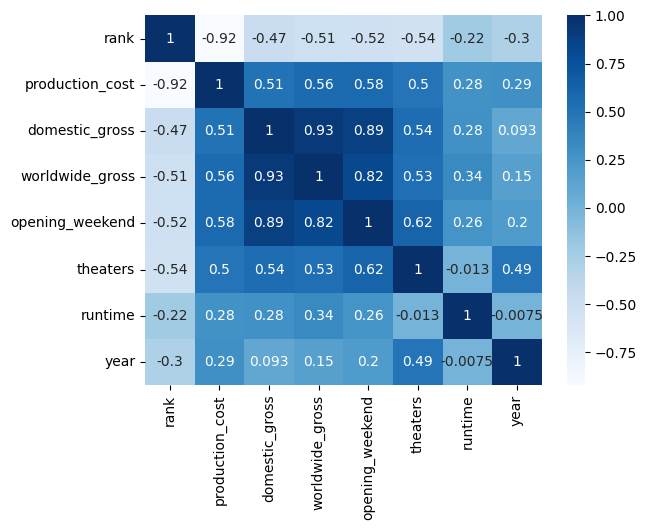

In [226]:
sb.heatmap(correlacao, cmap='Blues', annot=True)

## 2. Custos de produção (production_cost) e arrecadação de bilheteria mundial (worldwide_gross)

### 2.1 20 FILMES COM MAIOR CUSTO DE PRODUÇÃO

In [227]:
dataframe_filmes_20_maiores_custos = dataframe_filmes.sort_values(by='production_cost', ascending=False).head(20)
dataframe_filmes_20_maiores_custos['ranking'] = range(1, 21)
dataframe_filmes_20_maiores_custos['production_cost'] = dataframe_filmes_20_maiores_custos['production_cost'].apply(lambda x: '${:,.2f}'.format(x)) # Acrescenta $ e vírgulas
dataframe_filmes_20_maiores_custos.loc[:, ['rank', 'title', 'year', 'production_cost']]

,rank,title,year,production_cost
0,1,Avengers: Endgame,2019.0,"$400,000,000.00"
1,2,Pirates of the Caribbean: On Stranger Tides,2011.0,"$379,000,000.00"
2,3,Avengers: Age of Ultron,2015.0,"$365,000,000.00"
3,4,Star Wars Ep. VII: The Force Awakens,2015.0,"$306,000,000.00"
4,5,Avengers: Infinity War,2018.0,"$300,000,000.00"
5,6,Pirates of the Caribbean: At World’s End,2007.0,"$300,000,000.00"
6,7,Justice League,2017.0,"$300,000,000.00"
7,8,Spectre,2015.0,"$300,000,000.00"
9,10,Star Wars: The Rise of Skywalker,2019.0,"$275,000,000.00"
10,11,Solo: A Star Wars Story,2018.0,"$275,000,000.00"


In [243]:
dataframe_filmes_20_maiores_custos.iloc[:,[0,2,12,4]]

,rank,title,year,production_cost
0,1,Avengers: Endgame,2019.0,"$400,000,000.00"
1,2,Pirates of the Caribbean: On Stranger Tides,2011.0,"$379,000,000.00"
2,3,Avengers: Age of Ultron,2015.0,"$365,000,000.00"
3,4,Star Wars Ep. VII: The Force Awakens,2015.0,"$306,000,000.00"
4,5,Avengers: Infinity War,2018.0,"$300,000,000.00"
5,6,Pirates of the Caribbean: At World’s End,2007.0,"$300,000,000.00"
6,7,Justice League,2017.0,"$300,000,000.00"
7,8,Spectre,2015.0,"$300,000,000.00"
9,10,Star Wars: The Rise of Skywalker,2019.0,"$275,000,000.00"
10,11,Solo: A Star Wars Story,2018.0,"$275,000,000.00"


### 2.2 20 FILMES COM MAIOR BILHETERIA MUNDIAL

In [244]:
dataframe_filmes_20_maiores_bilheteria = dataframe_filmes.sort_values(by='worldwide_gross', ascending=False).head(20)
dataframe_filmes_20_maiores_bilheteria['ranking'] = range(1, 21)
dataframe_filmes_20_maiores_bilheteria['worldwide_gross'] = dataframe_filmes_20_maiores_bilheteria['worldwide_gross'].apply(lambda x: '${:,.2f}'.format(x)) # Acrescenta $ e vírgulas
dataframe_filmes_20_maiores_bilheteria.loc[:, ['ranking', 'title', 'year', 'worldwide_gross']]

,ranking,title,year,worldwide_gross
24,1,Avatar,2009.0,"$2,910,370,905.00"
0,2,Avengers: Endgame,2019.0,"$2,797,800,564.00"
48,3,Titanic,1997.0,"$2,207,986,545.00"
3,4,Star Wars Ep. VII: The Force Awakens,2015.0,"$2,064,615,817.00"
4,5,Avengers: Infinity War,2018.0,"$2,048,359,754.00"
46,6,Spider-Man: No Way Home,2021.0,"$1,912,775,610.00"
37,7,Jurassic World,2015.0,"$1,669,979,967.00"
14,8,The Lion King,2019.0,"$1,647,778,651.00"
29,9,The Avengers,2012.0,"$1,515,100,211.00"
89,10,Furious 7,2015.0,"$1,514,553,486.00"


## 3.

### 3.1 GÊNEROS DOS 20 FILMES COM MAIOR CUSTO DE PRODUÇÃO

In [230]:
dataframe_filmes_20_maiores_custos['genre'].unique()

array(['Action', 'Adventure', 'Musical'], dtype=object)

In [231]:
type(dataframe_filmes_20_maiores_custos['genre'].unique())

numpy.ndarray

In [232]:
lista_generos_filmes = dataframe_filmes_20_maiores_custos['genre'].unique().tolist()
lista_generos_filmes

['Action', 'Adventure', 'Musical']

### 3.2 GÊNEROS DOS 20 FILMES COM MAIOR BILHETERIA MUNDIAL

In [233]:
dataframe_filmes_20_maiores_bilheteria['genre'].unique()

array(['Action', 'Drama', 'Adventure', 'Musical'], dtype=object)

In [234]:
type(dataframe_filmes_20_maiores_bilheteria['genre'].unique())

numpy.ndarray

In [235]:
lista_generos_filmes = dataframe_filmes_20_maiores_bilheteria['genre'].unique().tolist()
lista_generos_filmes

['Action', 'Drama', 'Adventure', 'Musical']

## 4. MÉDIA DE ARRECADAÇÃO DOS 20 FILMES COM MAIOR BILHETERIA MUNDIAL

In [246]:
dataframe_filmes_20_maiores_bilheteria = dataframe_filmes.sort_values(by='worldwide_gross', ascending=False).head(20)
media_arrecadacao = dataframe_filmes_20_maiores_bilheteria['worldwide_gross'].mean()
media_arrecadacao_print = '${:,.2f}'.format(media_arrecadacao)
# Acrescenta $ e vírgulas
print(f"A média de arrecadação dos 20 filmes com maior bilheteria mundial é: {media_arrecadacao_print}")


A média de arrecadação dos 20 filmes com maior bilheteria mundial é: $1,683,804,948.85


## 5. ARRECADAÇÃO DOS 20 FILMES COM MAIOR BILHETERIA MUNDIAL

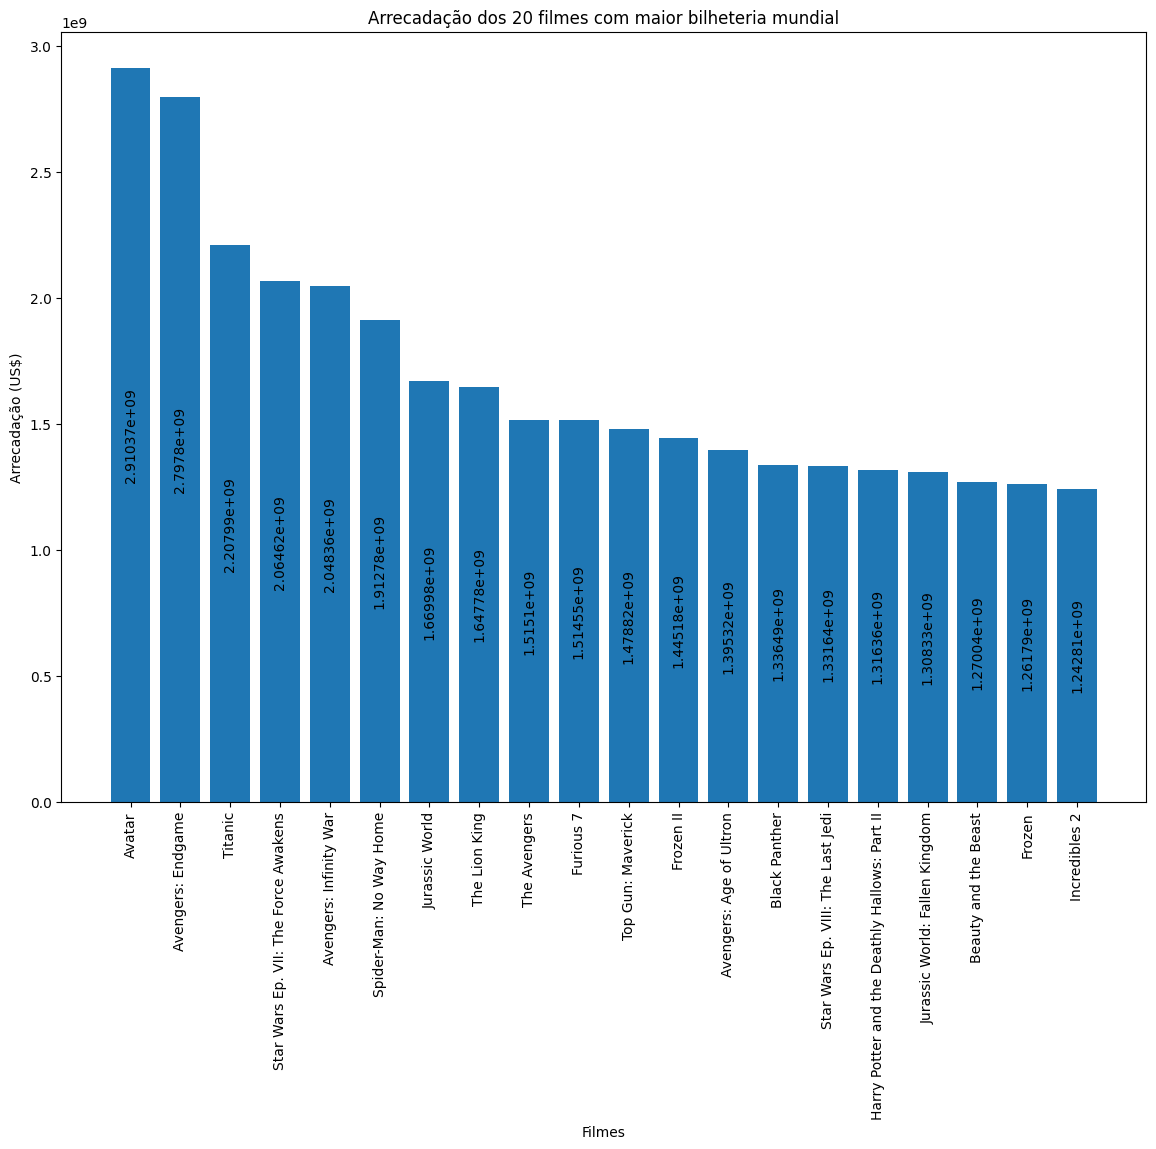

In [237]:
dataframe_filmes_20_maiores_bilheteria = dataframe_filmes.sort_values(by='worldwide_gross', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(14, 10))

ax.bar(dataframe_filmes_20_maiores_bilheteria['title'], dataframe_filmes_20_maiores_bilheteria['worldwide_gross']) # (x, y)

ax.bar_label(ax.containers[0], label_type='center', rotation=90) # Coloca o valor dentro da barra

ax.set_title('Arrecadação dos 20 filmes com maior bilheteria mundial')
ax.set_xlabel('Filmes')
ax.set_ylabel('Arrecadação (US$)')

plt.xticks(rotation=90)
plt.show()


## 6. PERCENTUAL DE PARTICIPAÇÃO DOS 20 FILMES COM MAIOR BILHETERIA MUNDIAL

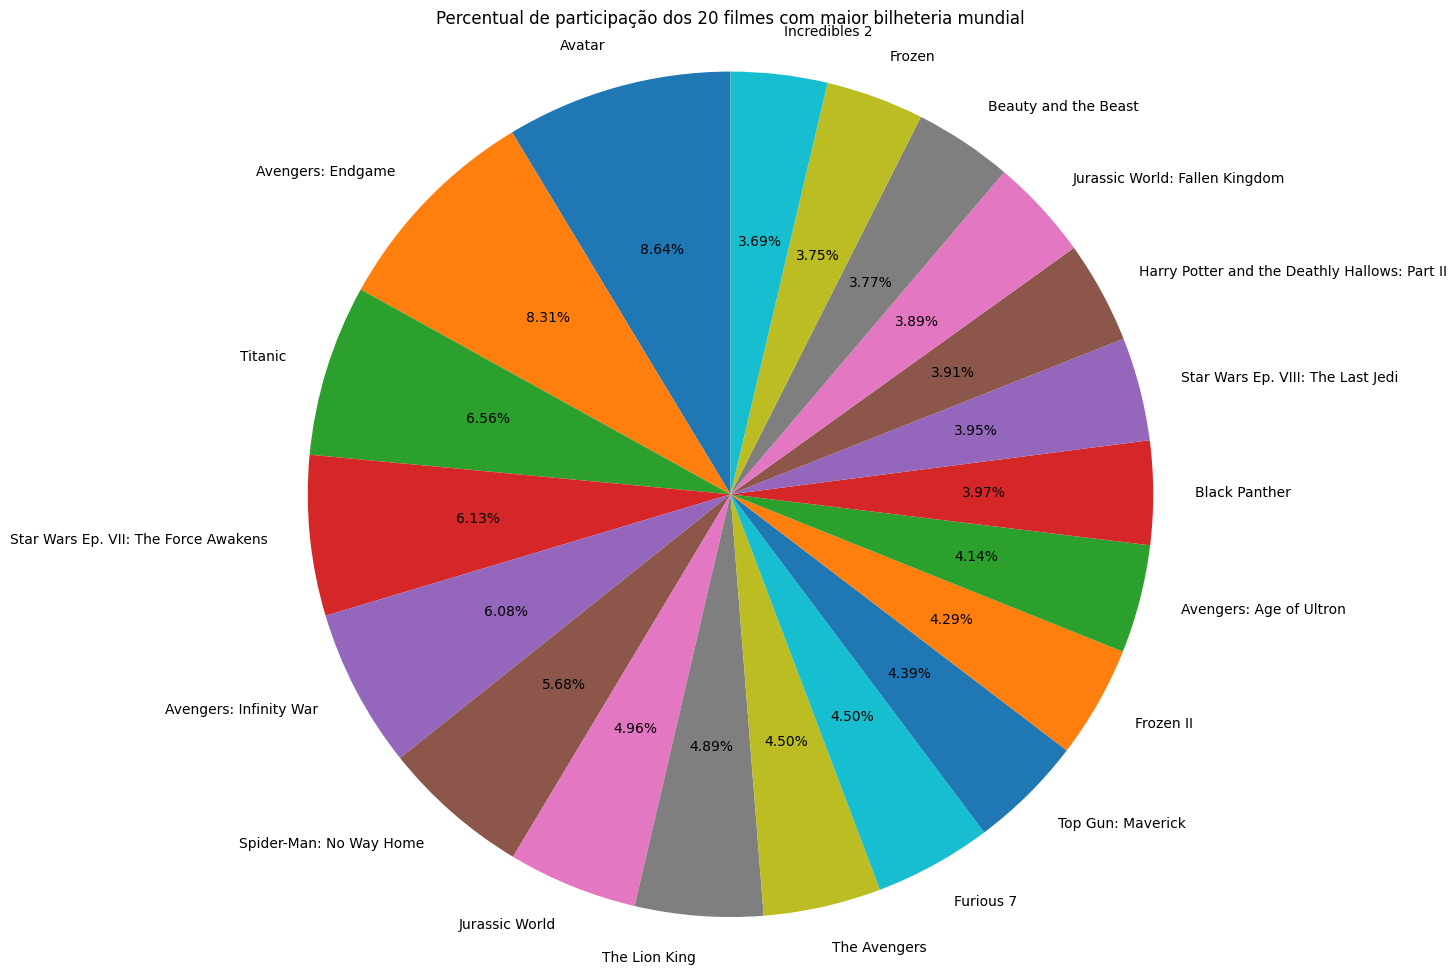

In [238]:
dataframe_20_maiores_bilheteria = dataframe_filmes.sort_values(by='worldwide_gross', ascending=False).head(20)
dataframe_20_maiores_bilheteria['percentual_participacao'] = (dataframe_20_maiores_bilheteria['worldwide_gross'] / dataframe_20_maiores_bilheteria['worldwide_gross'].sum()) * 100

fig, ax = plt.subplots(figsize=(12, 12))

ax.pie(dataframe_20_maiores_bilheteria['percentual_participacao'], labels=dataframe_20_maiores_bilheteria['title'], autopct="%0.2f%%", startangle=90)

ax.axis("equal")

plt.title('Percentual de participação dos 20 filmes com maior bilheteria mundial')

plt.show()


## 7. GRÁFICO DE SÉRIE TEMPORAL QUE REPRESENTA A EVOLUÇÃO DO VALOR TOTAL DE ARRECADAÇÃO DOS 20 FILMES COM MAIOR BILHETERIA MUNDIAL AO LONGO DOS ÚLTIMOS 25 ANOS

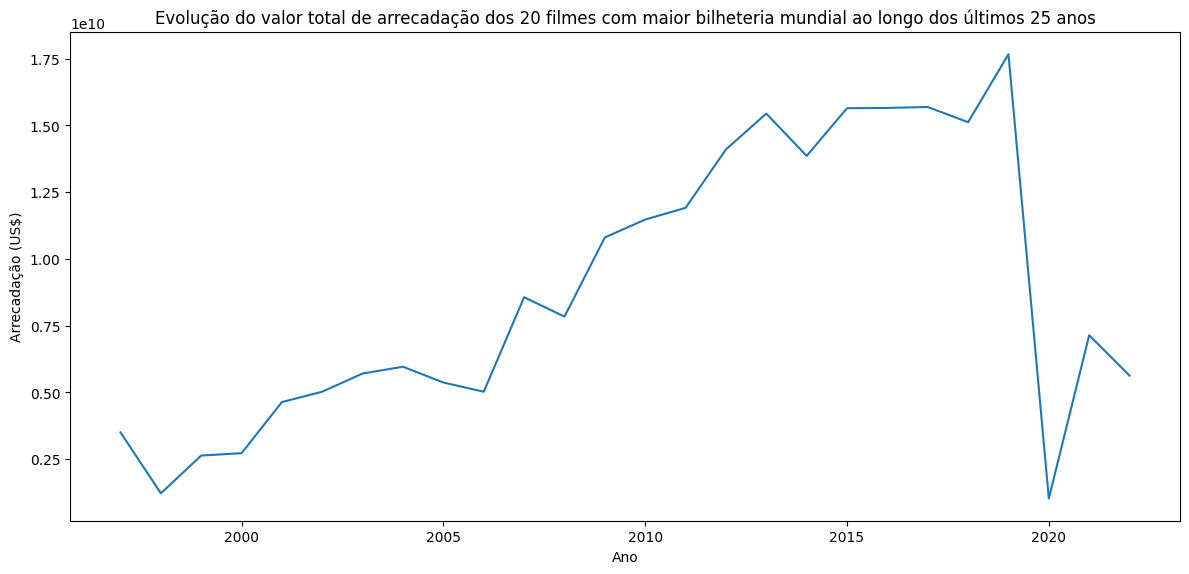

In [239]:
dataframe_ultimos_25_anos = dataframe_filmes[dataframe_filmes['year'] >= (dataframe_filmes['year'].max() - 25)]

dataframe_arrecadacao_por_ano = dataframe_ultimos_25_anos.groupby('year')['worldwide_gross'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dataframe_arrecadacao_por_ano['year'], dataframe_arrecadacao_por_ano['worldwide_gross'])

ax.set_title('Evolução do valor total de arrecadação dos 20 filmes com maior bilheteria mundial ao longo dos últimos 25 anos')
ax.set_xlabel('Ano')
ax.set_ylabel('Arrecadação (US$)')

plt.xticks()
plt.tight_layout()
plt.show()


## 8. MÉDIA DE ARRECADAÇÃO DE BILHETERIA MUNDIAL DOS 20 FILMES DE AÇÃO COM MAIOR BILHETERIA MUNDIAL

In [240]:
dataframe_filmes_acao = dataframe_filmes[dataframe_filmes['genre'] == 'Action'].sort_values(by='worldwide_gross', ascending=False).head(20)
media_arrecadacao_acao = dataframe_filmes_acao['worldwide_gross'].mean()
media_arrecadacao_acao_print = '$ {:,.2f}'.format(media_arrecadacao_acao)
print(f"A média de arrecadação de bilheteria mundial dos 20 filmes de ação com maior bilheteria mundial é: US{media_arrecadacao_acao_print}")


A média de arrecadação de bilheteria mundial dos 20 filmes de ação com maior bilheteria mundial é: US$ 1,511,815,901.90


## 9. MÉDIA DE CUSTO DE PRODUÇÃO DOS 20 FILMES DE AVENTURA COM MAIOR BILHETERIA MUNDIAL


In [241]:
df_filmes_aventura = dataframe_filmes[dataframe_filmes['genre'] == 'Adventure'].sort_values(by='worldwide_gross', ascending=False).head(20)
media_custo_producao_aventura = df_filmes_aventura['production_cost'].mean()
media_custo_producao_aventura_print = '${:,.2f}'.format(media_custo_producao_aventura)
print(f"A média de custo de produção dos 20 filmes de aventura com maior bilheteria mundial é: US {media_custo_producao_aventura_print}")

A média de custo de produção dos 20 filmes de aventura com maior bilheteria mundial é: US $202,400,000.00


## 10. GRÁFICO QUE AGRUPA OS FILMES POR GÊNERO E MOSTRA O PERCENTUAL DE PARTICIPAÇÃO DE PARTICIPAÇÃO MUNDIAL DE TODOS OS FILMES DO DATASET POR GÊNERO

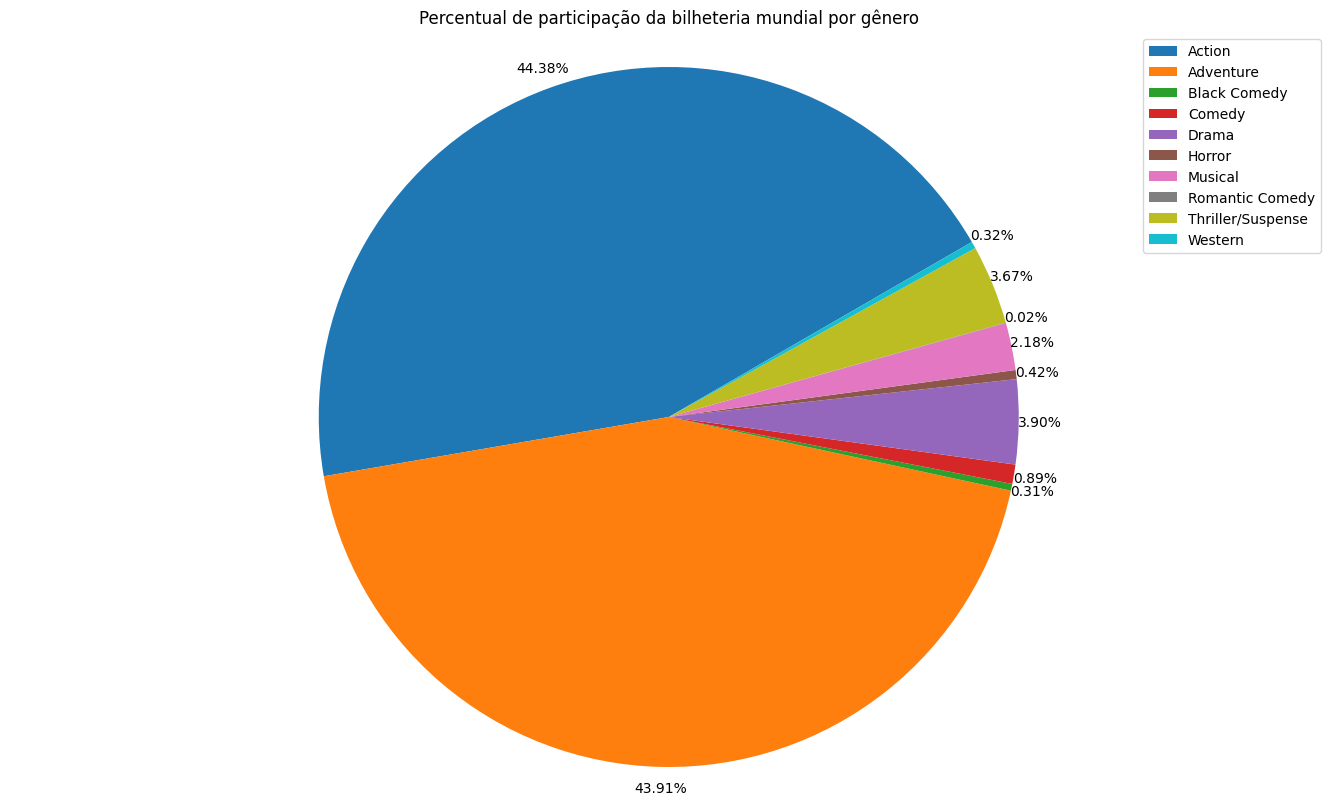

In [242]:
bilheteria_por_genero = dataframe_filmes.groupby('genre')['worldwide_gross'].sum()

percentual_por_genero = (bilheteria_por_genero / bilheteria_por_genero.sum()) * 100

fig, ax = plt.subplots(figsize=(17, 10))
ax.pie(percentual_por_genero, autopct='%.2f%%', startangle=30, pctdistance=1.06)
plt.legend(labels=percentual_por_genero.index, loc='upper right')

ax.set_title('Percentual de participação da bilheteria mundial por gênero')
ax.axis("equal")

plt.show()
